In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [101]:
blooddf = pd.read_csv('blood.csv')
blooddf

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


In [102]:
def op_sse(upphi,t):
    upphi = np.concatenate((np.ones((upphi.shape[0],1),int),upphi),1)
    return np.linalg.pinv(upphi)@t

def sse(phi,w,t):
    phi = np.insert(phi,0,1,axis=0)
    polyf = w.T@phi
    return (1/2)*np.sum((polyf-t)**2)

X = blooddf.drop('Class',axis=1).values
y = blooddf['Class'].values

w_ML = op_sse(X,y)

In [103]:
def lms(w_ML,X,y,epochs=1000):
    X = np.insert(X,0,1,axis=1)
    for epoch in range(epochs):
        for i in range(0,len(y)):
            w_ML = w_ML+(0.00000000000000001*(y[i] - w_ML.T @ X[i])*X[i])
    return w_ML

In [104]:
def rmse(w,phi,t,N):
    return np.sqrt(2*sse(phi,w,t)/N)

def pred(op_sse,phi):
    phi = np.insert(phi,0,1,axis=0)
    return op_sse.T@phi

y_pred = np.round(pred(w_ML,X.T))
rmse1 = rmse(w_ML,X.T,y,len(y))

def pred_fixed(y_train_pred):
    for i in range(0,len(y_train_pred)):
        if y_train_pred[i] == 0:
            y_train_pred[i] = 1
    return y_train_pred

#print(pred_fixed(y_pred))

print('RMSE for original training data:',rmse1)

RMSE for original training data: 0.3974118829733512


In [105]:
print(rmse(lms(w_ML,X,y),X.T,y,len(y)))
#both get roughly the same RMSE

0.3974118829733513


In [106]:
blooddf_train,blooddf_value = train_test_split(blooddf,test_size=0.25,random_state=50)
blooddf_value,blooddf_test = train_test_split(blooddf,test_size=0.4,random_state=50)

In [107]:
X_train = blooddf_train.drop('Class',axis=1).values
y_train = blooddf_train['Class'].values

X_test = blooddf_test.drop('Class',axis=1).values
y_test = blooddf_test['Class'].values

In [108]:
w_ML_train = op_sse(X_train,y_train)

y_train_pred = np.round(pred(w_ML_train,X_train.T))

print(pred_fixed(y_train_pred))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [109]:
rmse_train = rmse(w_ML_train,X_train.T,y_train,len(y_train))
print(rmse_train)

rmse2_train = rmse(lms(w_ML_train,X_train,y_train),X_train.T,y_train,len(y_train))
print(rmse2_train)

0.38580243439105744
0.3858024343910574


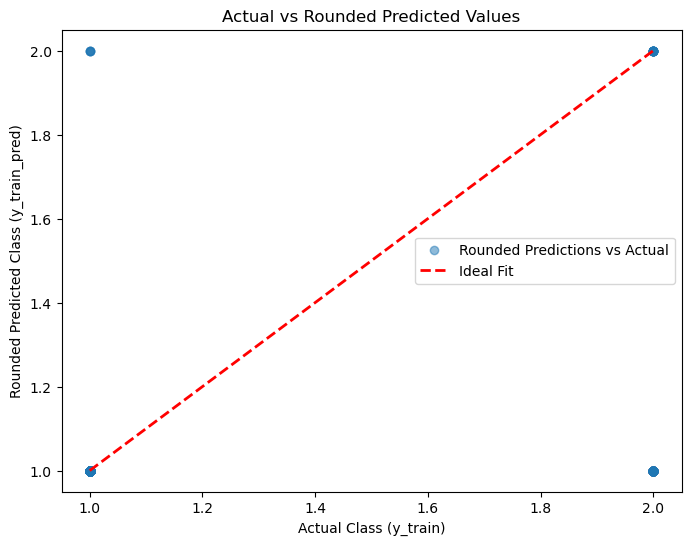

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label="Rounded Predictions vs Actual")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Class (y_train)")
plt.ylabel("Rounded Predicted Class (y_train_pred)")
plt.title("Actual vs Rounded Predicted Values")
plt.legend()
plt.show()

In [111]:
mismatch_train = np.where(y_train != y_train_pred)[0]
percentage1 = np.round(100-((len(mismatch_train)/len(y_train))*100))
print(percentage1,"% accuracy on the train set")

mismatch_whole = np.where(y != y_pred)[0]
percentage2 = np.round(100-((len(mismatch_whole)/len(y))*100))
print(percentage2,"% accuracy on the whole set")

79.0 % accuracy on the train set
77.0 % accuracy on the whole set


In [135]:
blooddf_train2,blooddf_test2 = train_test_split(blooddf,test_size=0.2,random_state=50)

In [136]:
X_train2 = blooddf_train2.drop('Class',axis=1).values
y_train2 = blooddf_train2['Class'].values

X_test2 = blooddf_test2.drop('Class',axis=1).values
y_test2 = blooddf_test2['Class'].values

print(np.shape(X_train2))

(598, 4)


In [137]:
w_ML_train2 = op_sse(X_train2,y_train2)
y_train2_pred = np.round(pred(w_ML_train2,X_train2.T))
rmse_train2 = rmse(w_ML_train2,X_train2.T,y_train2,len(y_train2))
rmse2_train2 = rmse(lms(w_ML_train2,X_train2,y_train2),X_train2.T,y_train2,len(y_train2))
rmse_test2 = rmse(w_ML_train2,X_test2.T,y_test2,len(y_test2))
rmse2_test2 = rmse(lms(w_ML_train2,X_test2,y_test2),X_test2.T,y_test2,len(y_test2))

print(rmse_train2)
print(rmse2_train2)
print(rmse_test2)
print(rmse2_test2)

mismatch_train2 = np.where(y_train2 != y_train2_pred)[0]
percentage3 = np.round(100-((len(mismatch_train2)/len(y_train2))*100))
print(percentage3,"% accuracy on the train set")

0.3911972905276676
0.3911972905276676
0.4221763352854577
0.42217633491083567
78.0 % accuracy on the train set
